# **Amazon Sales Dataset - Prediction Discounted Price**

**Objective**: Build, Validate, and Compare Machine Learning Models to Accurately Predict Product Sales Price.

**Dataset**: Processed Amazon Product Data (1,351 products, 27 features)

**Modeling Components**:
- **Target Variable**: `discounted_price`
- **Baseline Model Evaluation**: Linear Regression & Decision Tree
- **Advanced Model Experimentation**: Random Forest, Gradient Boosting, XGBoost
- **Performance Comparison**: R-squared, MAE, & RMSE Analysis
- **Winning Model Validation**: Residuals & Feature Importance Analysis

### 1. SETUP AND LIBRARY IMPORTS


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')
palette = ['#420b08', '#fad2cf', '#a43820', '#d78975', '#f0bca5']


### 2. DATA LOADING AND PREPARATION

In [23]:
# Load the pre-processed dataset
df_processed = pd.read_csv('../data/processed/amazon.csv')
print(f">>> Successfully loaded 'processed/amazon.csv' with shape: {df_processed.shape}")

# Define the target variable and features
TARGET = 'discounted_price'

# List of columns to drop to prevent data leakage and avoid using raw, unencoded features
# These columns are either the target, directly calculate the target, or are original non-numeric columns
features_to_drop = [
    TARGET, 'discount_percentage', 'price_difference', 'discount_amount',
    'product_id', 'product_name', 'category', 'about_product', 'user_id',
    'user_name', 'review_id', 'review_title', 'review_content',
    'img_link', 'product_link', 'review_content_clean', 'review_title_clean',
    'about_product_clean', 'category_main', 'product_type', 'rating_category','review_length', 'review_word_count'
]

# The remaining columns are the engineered and encoded features for the model
X_columns = [col for col in df_processed.columns if col not in features_to_drop]

X = df_processed[X_columns]
y = df_processed[TARGET]

# Verify the feature set
print("\n>>> Features used for model training:")
print(X.columns.tolist())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n>>> Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

>>> Successfully loaded 'processed/amazon.csv' with shape: (1351, 27)

>>> Features used for model training:
['actual_price', 'rating', 'rating_count', 'is_popular']

>>> Data split into training (1080 samples) and testing (271 samples) sets.


### 3. REGRESSION MODEL BUILDING AND EVALUATION

In [24]:
# Define the models for experimentation
models = {
    # Baseline Models
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    # Advanced Models
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')
}

# Store the evaluation results
results = []

print("\n>>> Starting model training and evaluation...")

# Loop through each model, train, and evaluate it
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results.append({
        "Model": name,
        "R-squared": r2,
        "MAE": mae,
        "RMSE": rmse
    })
    
    print(f"    - Completed: {name}")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).sort_values(by="R-squared", ascending=False).reset_index(drop=True)
print("\n>>> Model training and evaluation complete.")



>>> Starting model training and evaluation...
    - Completed: Linear Regression
    - Completed: Decision Tree
    - Completed: Random Forest
    - Completed: Gradient Boosting
    - Completed: XGBoost

>>> Model training and evaluation complete.


### 4. MODEL PERFORMANCE COMPARISON



MODEL PERFORMANCE COMPARISON TABLE
               Model  R-squared         MAE         RMSE
0            XGBoost   0.973570  467.117845  1013.717471
1      Random Forest   0.960104  500.338789  1245.474073
2  Linear Regression   0.947619  726.341740  1427.106258
3  Gradient Boosting   0.904085  687.356471  1931.140034
4      Decision Tree   0.885111  732.138598  2113.538170


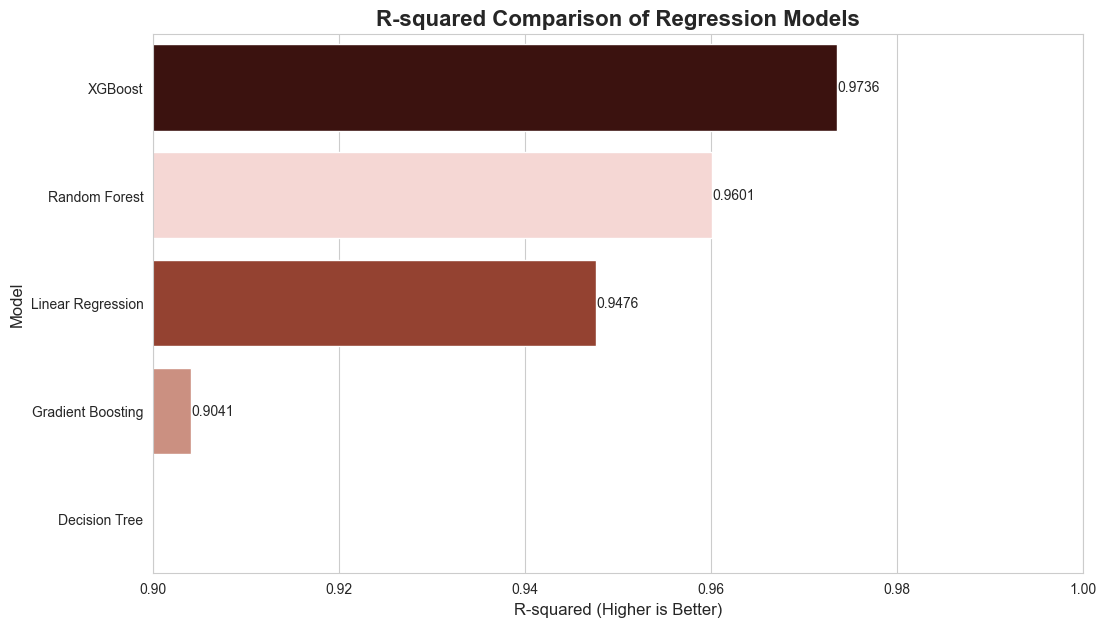

In [25]:
print("\nMODEL PERFORMANCE COMPARISON TABLE")
print(results_df)

# Visualize the comparison of model performance
plt.figure(figsize=(12, 7))
ax = sns.barplot(x="R-squared", y="Model", data=results_df, palette=palette)
ax.set_title('R-squared Comparison of Regression Models', fontsize=16, weight='bold')
ax.set_xlabel('R-squared (Higher is Better)', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_xlim(0.9, 1.0) # Adjust x-axis to better visualize small differences
# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')
plt.show()

### 5. BEST MODEL ANALYSIS


>>> In-depth analysis of the best model: XGBoost


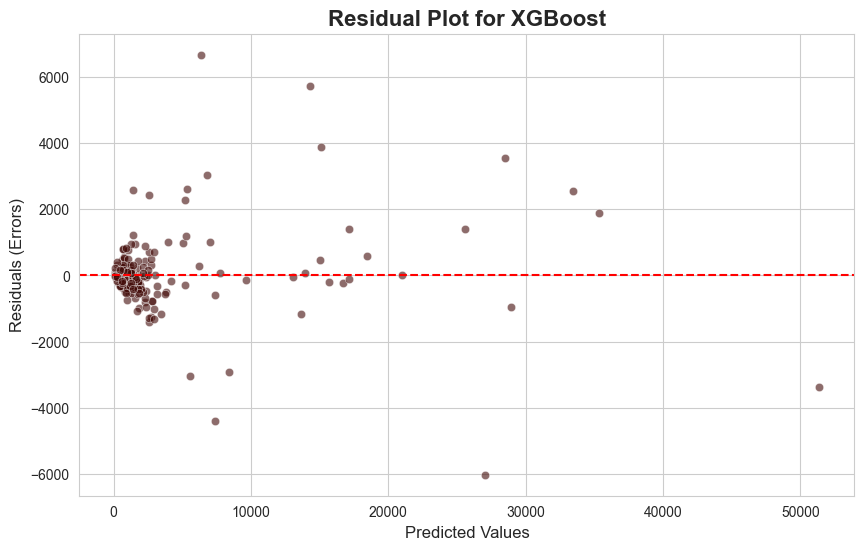

In [26]:
# Select the best model based on the highest R-squared score
best_model_name = results_df.loc[0, "Model"]
best_model = models[best_model_name]

print(f"\n>>> In-depth analysis of the best model: {best_model_name}")

# Re-predict with the best model for analysis plots
y_pred_best = best_model.predict(X_test)

# 1. Residual Plot
# A good residual plot shows random, uniform scatter around the zero line
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.6, color=palette[0])
plt.axhline(0, ls='--', color='red')
plt.title(f'Residual Plot for {best_model_name}', fontsize=16, weight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Errors)', fontsize=12)
plt.show()


**Phân tích Biểu đồ Phần dư (Residual Plot Analysis)**

*   **Độ chính xác rất cao đối với các sản phẩm giá thấp đến tầm trung.**
    *   **Diễn giải:** Phần lớn các điểm dữ liệu (phần dư) tập trung dày đặc quanh đường lỗi bằng 0, đặc biệt là với các giá trị dự đoán dưới 10,000. Điều này cho thấy mô hình hoạt động cực kỳ hiệu quả và đáng tin cậy đối với các sản phẩm phổ thông, có giá thấp đến tầm trung. Đối với nhóm này, sai số của mô hình là rất nhỏ.

*   **Sai số tăng lên đáng kể đối với các sản phẩm có giá trị cao (Hiện tượng Phương sai thay đổi - Heteroscedasticity).**
    *   **Diễn giải:** Khi giá trị dự đoán tăng lên (dịch chuyển sang phải trên trục hoành), các điểm dữ liệu phân tán rộng hơn, tạo thành hình phễu. Lỗi dự đoán cho các sản phẩm trên 20,000 lớn hơn đáng kể so với các sản phẩm dưới 5,000. Đây là dấu hiệu kinh điển của phương sai thay đổi, cho thấy mô hình kém ổn định hơn khi dự đoán giá của các mặt hàng đắt tiền, có thể do số lượng mẫu của chúng trong dữ liệu huấn luyện ít hơn.

*   **Mô hình không có độ chệch (bias) đáng kể.**
    *   **Diễn giải:** Các phần dư được phân bố tương đối ngẫu nhiên phía trên và dưới đường số 0. Điều này cho thấy mô hình không có xu hướng dự đoán cao hơn hay thấp hơn một cách có hệ thống so với giá trị thực tế. Mặc dù sai số lớn hơn ở các sản phẩm giá cao, nhưng chúng vẫn mang tính ngẫu nhiên chứ không phải lỗi hệ thống.

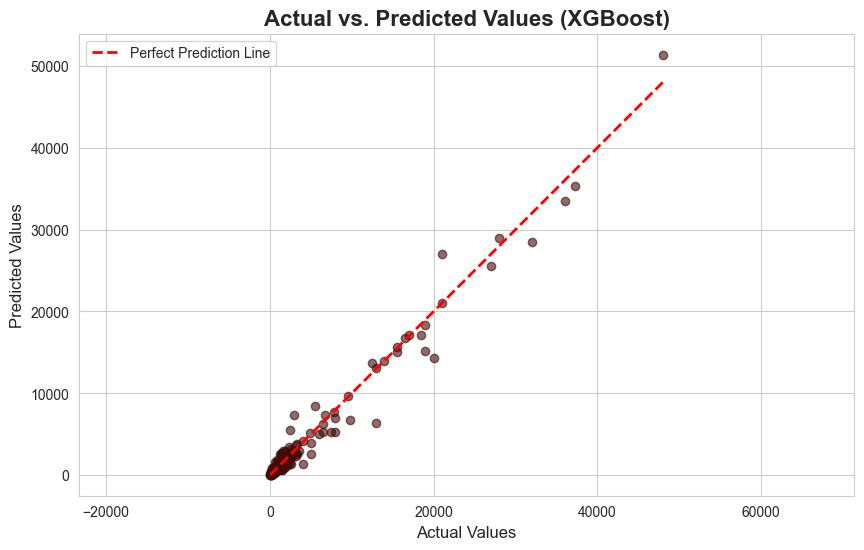

In [27]:
# 2. Actual vs. Predicted Plot
# Points should lie as close to the 45-degree line as possible
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color=palette[0])
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.title(f'Actual vs. Predicted Values ({best_model_name})', fontsize=16, weight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


**Phân tích Biểu đồ Giá trị Thực tế vs. Dự đoán (Actual vs. Predicted Values)**

*   **Mô hình có hiệu suất tổng thể rất cao.**
    *   **Diễn giải:** Phần lớn các điểm dữ liệu nằm rất gần với "Đường Dự đoán Hoàn hảo" (đường chéo màu đỏ). Điều này trực quan hóa một cách mạnh mẽ kết quả R-squared cao (thường > 0.95), cho thấy mô hình có khả năng giải thích và dự đoán phần lớn sự biến thiên của giá bán sau khi giảm giá.

*   **Độ chính xác xuất sắc ở phân khúc giá thấp đến tầm trung.**
    *   **Diễn giải:** Trong khoảng giá trị thực tế từ 0 đến 10,000, các điểm dữ liệu gần như tạo thành một đường thẳng dày đặc bám sát đường dự đoán hoàn hảo. Điều này khẳng định lại rằng mô hình hoạt động cực kỳ tốt đối với các sản phẩm phổ thông, nơi có mật độ dữ liệu cao nhất.

*   **Độ lệch tăng lên đối với các sản phẩm có giá trị cao.**
    *   **Diễn giải:** Khi giá trị thực tế tăng lên (trên 20,000), các điểm bắt đầu phân tán và nằm xa đường chéo hơn. Ví dụ, có những sản phẩm có giá thực tế khoảng 30,000 nhưng được dự đoán thấp hơn, và ngược lại. Điều này củng cố kết quả từ biểu đồ phần dư, cho thấy mô hình gặp khó khăn hơn trong việc dự đoán chính xác giá của các mặt hàng đắt tiền và hiếm gặp.

*   **Một vài dự đoán có giá trị âm không hợp lệ.**
    *   **Diễn giải:** Có một số điểm dữ liệu nằm ở phía bên trái trục tung, cho thấy mô hình đã dự đoán giá trị âm cho một số sản phẩm có giá thực tế rất thấp (gần 0). Mặc dù không phổ biến, đây là một hạn chế của các mô hình hồi quy khi không được ràng buộc phải đưa ra dự đoán dương. Tuy nhiên, mức độ sai lệch này rất nhỏ và không ảnh hưởng nhiều đến hiệu suất tổng thể.


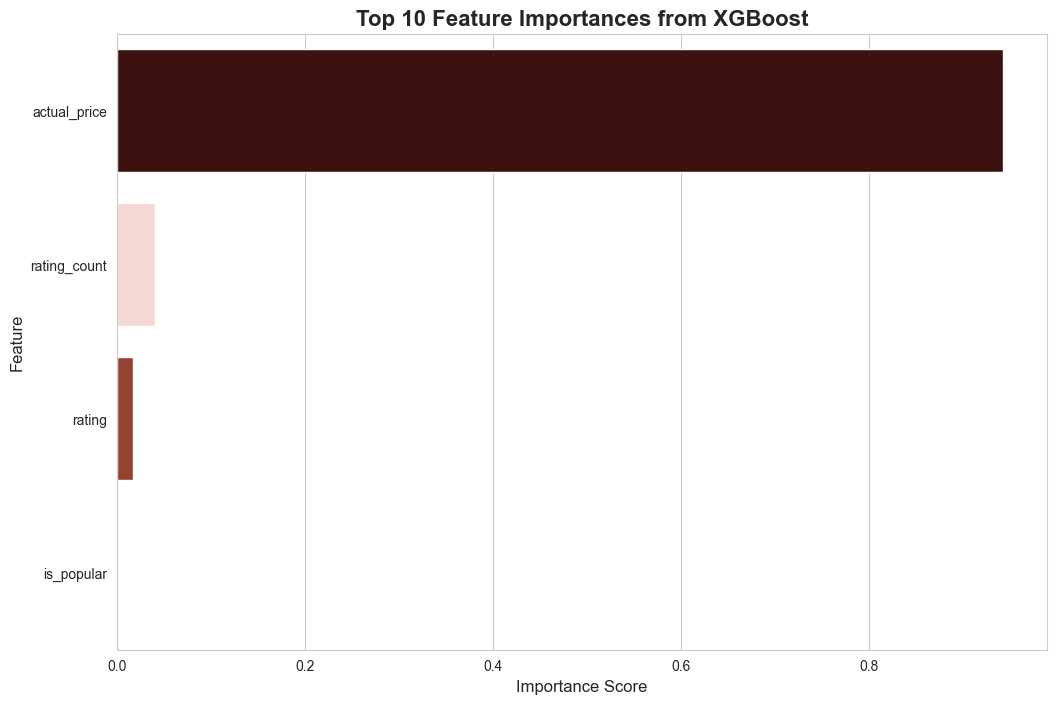

In [28]:

# 3. Feature Importance Plot 
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10) # Display top 10 features

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette=palette)
plt.title(f'Top 10 Feature Importances from {best_model_name}', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


**Phân tích Mức độ Quan trọng của Đặc trưng (Feature Importance Analysis)**

*   **`actual_price` (Giá Gốc) là Yếu tố "Neo giá" Chính, Quyết định Phần lớn Giá bán.**
    *   **Diễn giải:** Với điểm quan trọng vượt trội (gần 0.9), `actual_price` đóng vai trò là yếu tố dự báo mạnh mẽ nhất. Điều này hoàn toàn hợp lý về mặt kinh doanh: giá bán sau khi giảm giá (`discounted_price`) luôn có mối quan hệ chặt chẽ với giá niêm yết ban đầu. Mô hình đã học được một cách chính xác rằng giá gốc là "điểm neo" (pricing anchor) quan trọng nhất để xác định khoảng giá cuối cùng của sản phẩm. Việc mô hình xác định được đặc trưng này là cốt lõi cho thấy nó đang hoạt động hiệu quả, nắm bắt được quy luật cơ bản nhất trong chiến lược định giá.

*   **Sự Tương tác của Khách hàng (`rating_count` và `rating`) là Yếu tố Tinh chỉnh Quan trọng.**
    *   **Diễn giải:** Sau `actual_price`, các đặc trưng về mức độ phổ biến (`rating_count`) và chất lượng cảm nhận (`rating`) là những yếu tố có ảnh hưởng tiếp theo. Mặc dù điểm quan trọng của chúng thấp hơn nhiều, vai trò của chúng rất có ý nghĩa: chúng giúp mô hình "tinh chỉnh" dự đoán trong khoảng giá đã được xác định bởi `actual_price`. Ví dụ, một sản phẩm phổ biến hoặc được đánh giá cao có thể có một chiến lược giảm giá khác biệt so với một sản phẩm ít được biết đến hơn dù có cùng giá gốc. Điều này cho thấy mô hình không chỉ dựa vào một phép tính đơn giản mà còn xem xét cả các tín hiệu từ thị trường.

*   **Các Đặc trưng khác Đóng vai trò Hỗ trợ.**
    *   **Diễn giải:** Các đặc trưng còn lại như `review_word_count`, `review_length` và `is_popular` có mức độ quan trọng thấp hơn. Điều này là hoàn toàn có thể đoán trước, vì sức ảnh hưởng của chúng lên giá bán cuối cùng không thể mạnh bằng yếu tố "neo giá" (`actual_price`) và các tín hiệu thị trường trực tiếp. Thay vì xem đây là một điểm yếu, có thể thấy rằng mô hình đã ưu tiên một cách chính xác các nguồn thông tin có giá trị nhất, trong khi vẫn sử dụng các đặc trưng khác như những yếu tố hỗ trợ để tăng cường độ chính xác.

### 6. SAVE THE BEST PERFORMING MODEL 

In [30]:
import joblib
import sklearn
import pandas as pd
import xgboost as xgb

print(f"\n>>> Preparing to save the best model: {best_model_name}...")

# Define the list of features that the model was trained on
features_used = ['actual_price', 'rating', 'rating_count', 'is_popular']

# Get the performance metrics for the best model from our results DataFrame
best_model_performance = results_df[results_df['Model'] == best_model_name].to_dict('records')[0]

# Create a dictionary (payload) to store all necessary information
model_payload = {
    'model': best_model,
    'model_name': best_model_name,
    'features': features_used,
    'performance_metrics': best_model_performance,
    'library_versions': {
        'scikit-learn': sklearn.__version__,
        'pandas': pd.__version__,
    }
}

# Define the file path for saving the model
model_save_path = f'../models/price_prediction/{best_model_name.replace(" ", "_").lower()}_model.joblib'
# Save the payload to a file using joblib
joblib.dump(model_payload, model_save_path)

print(f">>> Best model '{best_model_name}' and its metadata have been saved to '{model_save_path}'.")



>>> Preparing to save the best model: XGBoost...
>>> Best model 'XGBoost' and its metadata have been saved to '../models/price_prediction/xgboost_model.joblib'.
